# From Neurons to Networks: Exploring Deep Learning Algorithms

Roderick Perez, Ph.D.
OMV

---

In [1]:
# Import libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

2024-10-22 20:22:43.331875: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-22 20:22:43.348104: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 20:22:43.584683: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-22 20:22:43.816846: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-22 20:22:44.061111: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

1. Load and split the MNIST dataset

In [2]:

def load_and_split_dataset():
    (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
    
    # Normalize the images to values between 0 and 1
    train_images, test_images = train_images / 255.0, test_images / 255.0
    
    return train_images, train_labels, test_images, test_labels

In [7]:
# Main execution
train_images, train_labels, test_images, test_labels = load_and_split_dataset()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


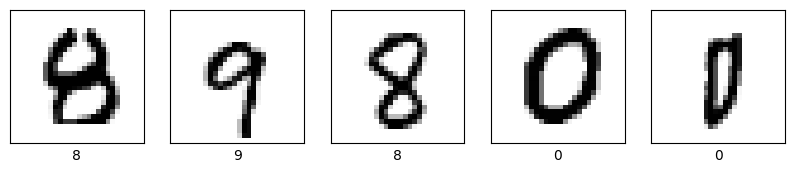

In [25]:
# From the training dataset, select 5 random images and display them
plt.figure(figsize=(10,10))
indices = np.random.choice(len(train_images), 5, replace=False)
for i, idx in enumerate(indices):
    plt.subplot(1, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[idx], cmap=plt.cm.binary)
    plt.xlabel(train_labels[idx])
plt.show()


2. Build and train the model on the training dataset

In [13]:
def build_and_train_model(train_images, train_labels):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),  # Input layer (28x28 pixels)
        layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
        layers.Dense(10, activation='softmax')  # Output layer (10 classes for 10 digits)
    ])
    
    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])
    
    # Train the model and capture the training process
    history = model.fit(train_images, train_labels, epochs=10, validation_split=0.1)
    
    return model, history

In [14]:
# Build and train the model
model, history = build_and_train_model(train_images, train_labels)

/home/codespace/.python/current/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8709 - loss: 0.4605 - val_accuracy: 0.9660 - val_loss: 0.1272
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9618 - loss: 0.1300 - val_accuracy: 0.9717 - val_loss: 0.0951
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9741 - loss: 0.0852 - val_accuracy: 0.9732 - val_loss: 0.0874
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9822 - loss: 0.0611 - val_accuracy: 0.9772 - val_loss: 0.0783
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9853 - loss: 0.0485 - val_accuracy: 0.9788 - val_loss: 0.0782
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9882 - loss: 0.0382 - val_accuracy: 0.9770 - val_loss: 0.0756
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9920 - loss: 0.0261 - val_accuracy: 0.9790 - val_loss: 0.0799
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9928 - loss: 0.0225 - 

3. Show the structure of the model (layers and number of parameters)

In [15]:
def show_model_structure(model):
    model.summary()

In [16]:
# Show the model structure (layers and parameters)
show_model_structure(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 305,312 (1.16 MB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 203,542 (795.09 KB)

4. Plot how the loss (error) changes over time

In [4]:
def plot_training_error(history):
    plt.plot(history.history['loss'], label='Training Error')
    plt.plot(history.history['val_loss'], label='Validation Error')
    plt.xlabel('Epoch')
    plt.ylabel('Error (Loss)')
    plt.legend()
    plt.title('Error (Loss) over Epochs')
    plt.show()

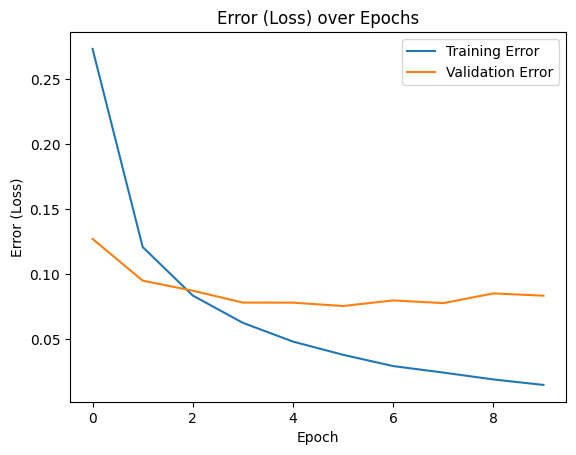

In [17]:
# Show how the error varies over each epoch
plot_training_error(history)

5. Calculate and show the confusion matrix

In [18]:
def plot_confusion_matrix(model, test_images, test_labels):
    predictions = np.argmax(model.predict(test_images), axis=1)
    cm = confusion_matrix(test_labels, predictions)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step


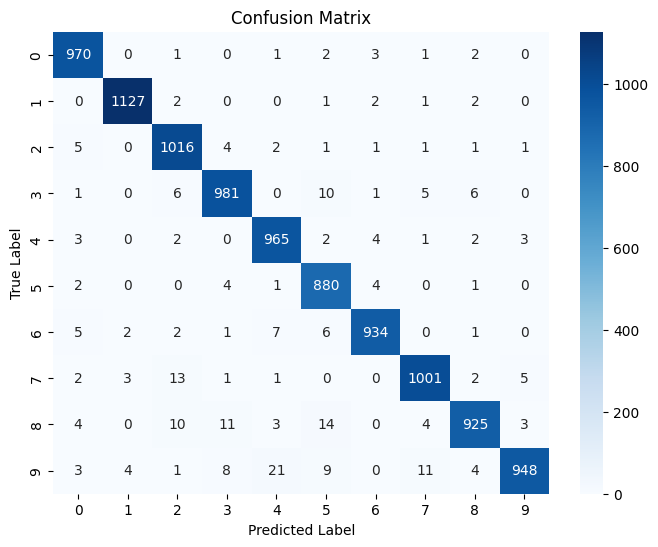

In [19]:
# Show the confusion matrix
plot_confusion_matrix(model, test_images, test_labels)

6. Select 5 random test images and show the inference results

In [21]:
# 6) Select 5 random test images, run inference, and display the result
def show_random_inferences(model, test_images, test_labels):
    plt.figure(figsize=(10, 10))
    
    # Select 5 random indices from the test dataset
    indices = np.random.choice(len(test_images), 5, replace=False)
    
    for i, idx in enumerate(indices):
        img = test_images[idx]
        true_label = test_labels[idx]
        
        # Make prediction on the selected image
        prediction = np.argmax(model.predict(img.reshape(1, 28, 28)), axis=1)[0]
        
        # Plot the image
        plt.subplot(1, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img, cmap=plt.cm.binary)
        
        # Display the true and predicted labels
        plt.xlabel(f'True: {true_label}\nPred: {prediction}')
    
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


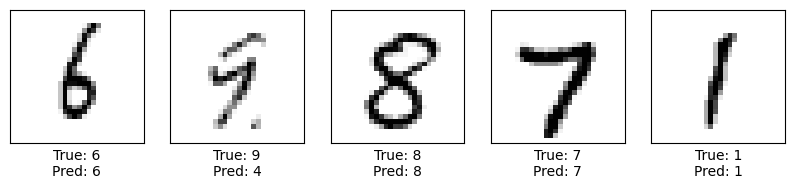

In [24]:
# Assuming 'model', 'test_images', and 'test_labels' are already defined and the model is trained
show_random_inferences(model, test_images, test_labels)